In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
#import dataset
df = pd.read_excel("Data_Train.xlsx")

In [3]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.shape

(10683, 11)

In [6]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(10682, 11)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
# one hot encoding to convert categorical values to numerical value
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [11]:
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [12]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [13]:
Source = df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [14]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [15]:
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [16]:
df.replace({'non-stop' :0,
           '1 stop' :1,
           '2 stops' :2,
           '3 stops' :3,
           '4 stops' :4
           },inplace= True)

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [18]:
#  Concatenate dataframe
df= pd.concat([df, Airline, Source, Destination],axis=1)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,...,0,0,0,0,0,0,0,0,0,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,...,0,0,0,0,0,0,0,0,0,1


In [19]:
df.drop(columns=['Airline','Source','Destination','Additional_Info','Route'],inplace=True)
df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,05:50,13:15,7h 25m,2,7662,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,18:05,23:30,5h 25m,1,6218,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,16:50,21:35,4h 45m,1,13302,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
df["Journey date"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day
df["Journey month"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month

In [21]:
df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,...,0,0,0,0,0,0,0,1,24,3
1,1/05/2019,05:50,13:15,7h 25m,2,7662,1,0,0,0,...,0,1,0,0,0,0,0,0,1,5
2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,...,1,0,0,1,0,0,0,0,9,6
3,12/05/2019,18:05,23:30,5h 25m,1,6218,0,0,1,0,...,0,1,0,0,0,0,0,0,12,5
4,01/03/2019,16:50,21:35,4h 45m,1,13302,0,0,1,0,...,0,0,0,0,0,0,0,1,1,3


In [22]:
df["Dep_hr"]=pd.to_datetime(df.Dep_Time).dt.hour
df["Dep_min"]=pd.to_datetime(df.Dep_Time).dt.minute

In [23]:
df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month,Dep_hr,Dep_min
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,...,0,0,0,0,0,1,24,3,22,20
1,1/05/2019,05:50,13:15,7h 25m,2,7662,1,0,0,0,...,0,0,0,0,0,0,1,5,5,50
2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,...,0,1,0,0,0,0,9,6,9,25
3,12/05/2019,18:05,23:30,5h 25m,1,6218,0,0,1,0,...,0,0,0,0,0,0,12,5,18,5
4,01/03/2019,16:50,21:35,4h 45m,1,13302,0,0,1,0,...,0,0,0,0,0,1,1,3,16,50


In [24]:
df["Arrival_hour"]=pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"]=pd.to_datetime(df.Arrival_Time).dt.minute

In [25]:
df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month,Dep_hr,Dep_min,Arrival_hour,Arrival_min
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,...,0,0,0,1,24,3,22,20,1,10
1,1/05/2019,05:50,13:15,7h 25m,2,7662,1,0,0,0,...,0,0,0,0,1,5,5,50,13,15
2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,...,0,0,0,0,9,6,9,25,4,25
3,12/05/2019,18:05,23:30,5h 25m,1,6218,0,0,1,0,...,0,0,0,0,12,5,18,5,23,30
4,01/03/2019,16:50,21:35,4h 45m,1,13302,0,0,1,0,...,0,0,0,1,1,3,16,50,21,35


In [26]:
df.drop(columns=['Duration','Dep_Time','Arrival_Time','Date_of_Journey'],inplace=True)
df.head()

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month,Dep_hr,Dep_min,Arrival_hour,Arrival_min
0,0,3897,0,0,1,0,0,0,0,0,...,0,0,0,1,24,3,22,20,1,10
1,2,7662,1,0,0,0,0,0,0,0,...,0,0,0,0,1,5,5,50,13,15
2,2,13882,0,0,0,1,0,0,0,0,...,0,0,0,0,9,6,9,25,4,25
3,1,6218,0,0,1,0,0,0,0,0,...,0,0,0,0,12,5,18,5,23,30
4,1,13302,0,0,1,0,0,0,0,0,...,0,0,0,1,1,3,16,50,21,35


In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.head()

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month,Dep_hr,Dep_min,Arrival_hour,Arrival_min
0,0,3897,0,0,1,0,0,0,0,0,...,0,0,0,1,24,3,22,20,1,10
1,2,7662,1,0,0,0,0,0,0,0,...,0,0,0,0,1,5,5,50,13,15
2,2,13882,0,0,0,1,0,0,0,0,...,0,0,0,0,9,6,9,25,4,25
3,1,6218,0,0,1,0,0,0,0,0,...,0,0,0,0,12,5,18,5,23,30
4,1,13302,0,0,1,0,0,0,0,0,...,0,0,0,1,1,3,16,50,21,35


In [29]:
df.isnull().sum()

Total_Stops                                  0
Price                                        0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_Kolkata                          0
Destination_N

# We have done the data preparation. Lets move on to the model building part

In [30]:
#spliting data into x and y

In [31]:
x = df.loc[:, ["Total_Stops","Airline_Air India", "Airline_GoAir", "Airline_IndiGo", "Airline_Jet Airways", "Airline_Jet Airways Business","Airline_Multiple carriers", "Airline_Multiple carriers Premium economy", "Airline_SpiceJet","Airline_Trujet","Airline_Vistara","Airline_Vistara Premium economy","Source_Chennai","Source_Delhi","Source_Kolkata","Source_Mumbai","Destination_Cochin","Destination_Delhi","Destination_Hyderabad","Destination_Kolkata","Destination_New Delhi","Journey date","Journey month","Dep_hr","Dep_min","Arrival_hour","Arrival_min"]]

In [32]:
x

,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month,Dep_hr,Dep_min,Arrival_hour,Arrival_min
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,24,3,22,20,1,10
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,5,5,50,13,15
2,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,9,6,9,25,4,25
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,12,5,18,5,23,30
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,4,19,55,22,25
10679,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,27,4,20,45,23,20
10680,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,27,4,8,20,11,20
10681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,3,11,30,14,10


In [33]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [34]:
y = df.loc[:, "Price"]

In [35]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10459, dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

# LINEAR REGRESSION

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(x_train, y_train)

LinearRegression()

In [39]:
lr_predict = lr.predict(x_test)


In [40]:
lr.score(x_test, y_test)

0.5857679937266027

In [41]:
r2_score(y_test, lr_predict)

0.5857679937266027

# RANDOM FOREST REGRESSOR

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rfr = RandomForestRegressor(n_estimators=1000, random_state=0)

In [48]:
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [49]:
rfr_predict = rfr.predict(x_test)

In [50]:
rfr.score(x_test, y_test)

0.8189987637243302

# WOKING ON TEST DATA SET

In [51]:
# We have to perform similar actions for this dataframe too, in order to extract the features:

In [52]:
test_data = pd.read_excel("Test_set.xlsx")

In [53]:
test_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [54]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [55]:
test_data.shape

(2671, 10)

In [56]:
test_data["Duration"].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
30h 45m      1
32h 5m       1
32h 20m      1
28h 55m      1
5m           1
Name: Duration, Length: 320, dtype: int64

In [57]:
test_data.dropna(inplace = True)
test_data.shape

(2671, 10)

In [58]:
# one hot encoding to convert categorical values to numerical value
test_data['Airline'].value_counts()
Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [59]:
test_data['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [60]:
Source = test_data[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [61]:
test_data['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [62]:
Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [63]:
test_data.replace({'non-stop' :0,
           '1 stop' :1,
           '2 stops' :2,
           '3 stops' :3,
           '4 stops' :4
           },inplace= True)

In [64]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info


In [65]:
#  Concatenate dataframe
test_data= pd.concat([test_data, Airline, Source, Destination],axis=1)
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,...,0,0,0,0,0,0,1,0,0,0


In [66]:
test_data.drop(columns=['Airline','Source','Destination','Additional_Info','Route'],inplace=True)
test_data.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6/06/2019,17:30,04:25 07 Jun,10h 55m,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,06:20,10:20,4h,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,19:15,19:00 22 May,23h 45m,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,08:00,21:00,13h,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,23:55,02:45 25 Jun,2h 50m,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [67]:
test_data["Journey date"]=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day
test_data["Journey month"]=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.month
test_data.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month
0,6/06/2019,17:30,04:25 07 Jun,10h 55m,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,6,6
1,12/05/2019,06:20,10:20,4h,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,12,5
2,21/05/2019,19:15,19:00 22 May,23h 45m,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,21,5
3,21/05/2019,08:00,21:00,13h,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,21,5
4,24/06/2019,23:55,02:45 25 Jun,2h 50m,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,24,6


In [68]:
test_data["Dep_hr"]=pd.to_datetime(test_data.Dep_Time).dt.hour
test_data["Dep_min"]=pd.to_datetime(test_data.Dep_Time).dt.minute
test_data.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month,Dep_hr,Dep_min
0,6/06/2019,17:30,04:25 07 Jun,10h 55m,1,0,0,0,1,0,...,0,1,0,0,0,0,6,6,17,30
1,12/05/2019,06:20,10:20,4h,1,0,0,1,0,0,...,0,0,0,0,0,0,12,5,6,20
2,21/05/2019,19:15,19:00 22 May,23h 45m,1,0,0,0,1,0,...,0,1,0,0,0,0,21,5,19,15
3,21/05/2019,08:00,21:00,13h,1,0,0,0,0,0,...,0,1,0,0,0,0,21,5,8,0
4,24/06/2019,23:55,02:45 25 Jun,2h 50m,0,0,0,0,0,0,...,0,0,1,0,0,0,24,6,23,55


In [69]:
test_data["Arrival_hour"]=pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"]=pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month,Dep_hr,Dep_min,Arrival_hour,Arrival_min
0,6/06/2019,17:30,04:25 07 Jun,10h 55m,1,0,0,0,1,0,...,0,0,0,0,6,6,17,30,4,25
1,12/05/2019,06:20,10:20,4h,1,0,0,1,0,0,...,0,0,0,0,12,5,6,20,10,20
2,21/05/2019,19:15,19:00 22 May,23h 45m,1,0,0,0,1,0,...,0,0,0,0,21,5,19,15,19,0
3,21/05/2019,08:00,21:00,13h,1,0,0,0,0,0,...,0,0,0,0,21,5,8,0,21,0
4,24/06/2019,23:55,02:45 25 Jun,2h 50m,0,0,0,0,0,0,...,1,0,0,0,24,6,23,55,2,45


In [70]:
test_data.drop(columns=['Duration','Dep_Time','Arrival_Time','Date_of_Journey'],inplace=True)
test_data.head()

,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month,Dep_hr,Dep_min,Arrival_hour,Arrival_min
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,6,6,17,30,4,25
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,12,5,6,20,10,20
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,21,5,19,15,19,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,21,5,8,0,21,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,24,6,23,55,2,45


In [71]:
test_data.drop_duplicates(inplace=True)
test_data.head()

,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month,Dep_hr,Dep_min,Arrival_hour,Arrival_min
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,6,6,17,30,4,25
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,12,5,6,20,10,20
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,21,5,19,15,19,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,21,5,8,0,21,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,24,6,23,55,2,45


In [72]:
test_data.isnull().sum()

Total_Stops                                  0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_Kolkata                          0
Destination_New Delhi                        0
Journey date                                 0
Journey month

In [73]:
df.columns

Index(['Total_Stops', 'Price', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Journey date',
       'Journey month', 'Dep_hr', 'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [74]:
x = df.loc[:,['Total_Stops','Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Journey date',
       'Journey month', 'Dep_hr', 'Dep_min', 'Arrival_hour', 'Arrival_min']]
x.head()

,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey date,Journey month,Dep_hr,Dep_min,Arrival_hour,Arrival_min
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,24,3,22,20,1,10
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,5,5,50,13,15
2,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,9,6,9,25,4,25
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,12,5,18,5,23,30
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,3,16,50,21,35


In [75]:
y = df.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

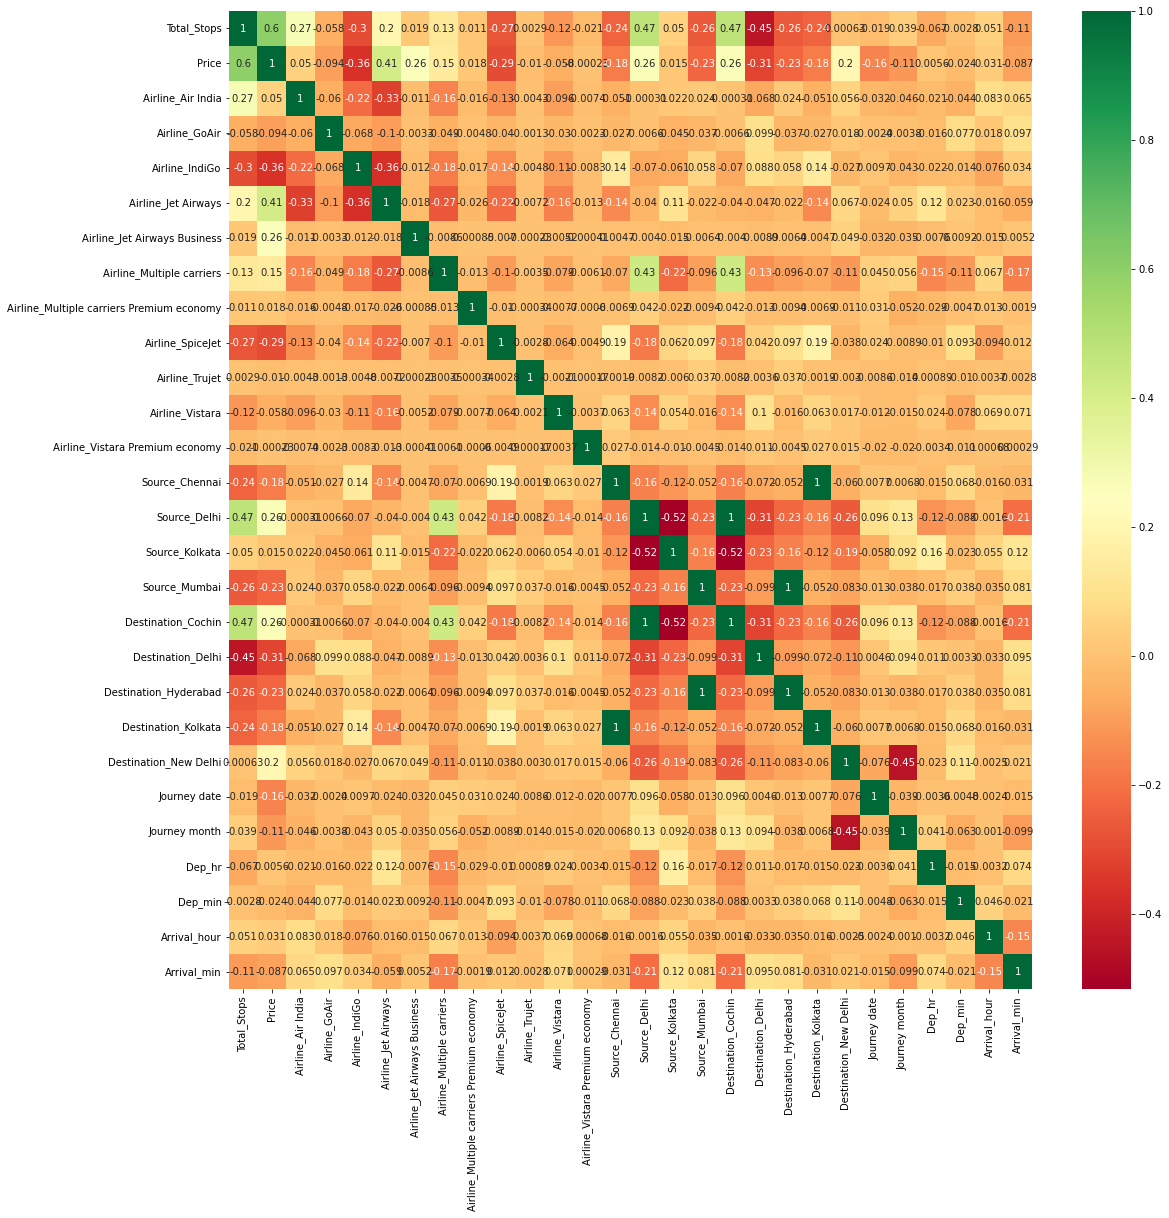

In [76]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [77]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rfr = RandomForestRegressor(n_estimators=1000, random_state=0)

In [80]:
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [81]:
rfr_predict = rfr.predict(x_test)

In [82]:
rfr.score(x_test, y_test)

0.8186079874235523

In [83]:
rfr.score(x_train, y_train)

0.9542908149611895

In [84]:
Y_rfr = rfr.predict(x_test)
Y_lr = lr.predict(x_test)

In [85]:
Y_lr, Y_rfr

(array([-9.00954616e+15, -8.14931330e+15, -9.00954616e+15, ...,
        -9.00954616e+15, -9.00954616e+15, -9.00954616e+15]),
 array([ 9293.576     ,  9147.0988    , 14598.85779524, ...,
         5191.13501905,  7323.095     , 10332.29505   ]))

In [86]:
from sklearn.metrics import r2_score

In [87]:
r2_score(y_test,Y_rfr)

0.8186079874235523

In [88]:
r2_score(y_test,Y_lr)

-2.8028328189669427e+24

In [89]:
# performing hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [93]:
param = {
       'criterion':['gini','entropy'],
       'max_depth': randint(2,8),
       'max_features' :randint(2,8)
}

In [95]:
model = RandomForestRegressor()

In [96]:
random_search = RandomizedSearchCV(estimator=model,param_distributions=param,cv=10,n_iter=20)

In [99]:
random_search.fit(x_train,y_train)

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.